In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('SolarPanelCostData_v4.csv')
pd.options.display.max_columns = None

In [5]:
df.head(5)

,Yes,No,Cost,Market_Year,Regions
0,1,0,7.7,2006,United States
1,1,0,8.6,2006,United States
2,1,0,8.1,2006,United States
3,1,0,7.9,2006,United States
4,1,0,7.8,2006,United States


In [6]:
df.describe()

,Yes,No,Cost,Market_Year
count,335.000000,335.000000,335.000000,335.000000
mean,0.829851,0.170149,7.845075,2005.743284
std,0.376326,0.376326,1.901535,3.013901
min,0.000000,0.000000,2.700000,1998.000000
25%,1.000000,0.000000,6.800000,2004.500000
50%,1.000000,0.000000,8.200000,2007.000000
75%,1.000000,0.000000,8.800000,2008.000000
max,1.000000,1.000000,12.300000,2009.000000


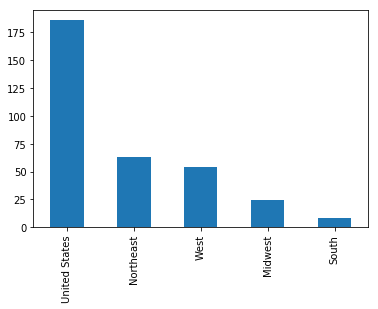

In [7]:
x = df['Regions'].value_counts().plot(kind='bar')

In [8]:
df = pd.read_csv('SolarPanelCostData_v2.csv')
pd.options.display.max_columns = None

In [9]:
df.head(2)

,Technology,Location,Cost Metric,Pre-incentive? Y or N,Numerical Value,Unit of Measurement,Data Year,Dollar Year,Market Year,Statistic,# Data points considered
0,Solar PV,U.S.,Installed Costs - Total,Y,7.7,$/WDC-STC,2006-2007,2007,2006-2007,Average - simple,39
1,Solar PV,U.S.,Installed Costs - Total,Y,8.6,$/WDC-STC,2006-2007,2007,2006-2007,Average - simple,1166


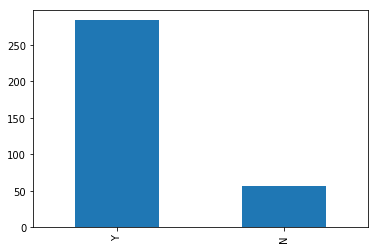

In [10]:
x = df['Pre-incentive? Y or N'].value_counts().plot(kind='bar')

In [11]:
df = pd.read_csv('Pre-Incentive.csv')
pd.options.display.max_columns = None

In [12]:
df.head(2)

,Year,Average
0,1998,11.6
1,1999,10.6


In [13]:
x=df['Year']
y=df['Average']

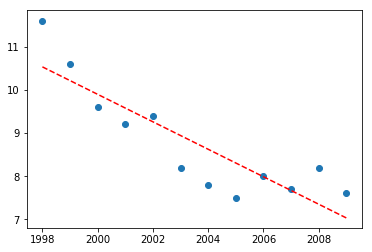

In [14]:
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [15]:
# create dictionary and data frame for just the mean cost by year
dict = {
    'Market Year':['Yr_1998','Yr_1999','Yr_2000','Yr_2001','Yr_2002','Yr_2003','Yr_2004','Yr_2005','Yr_2006','Yr_2007','Yr_2008','Yr_2009'],
    'MeanPrice':[11.13, 10.10, 9.18, 8.54, 8.75, 7.66, 7.31, 7.03, 7.87, 6.61, 7.50, 7.55]}
df_subset = pd.DataFrame(dict)
df_subset

,Market Year,MeanPrice
0,Yr_1998,11.13
1,Yr_1999,10.10
2,Yr_2000,9.18
3,Yr_2001,8.54
4,Yr_2002,8.75
5,Yr_2003,7.66
6,Yr_2004,7.31
7,Yr_2005,7.03
8,Yr_2006,7.87
9,Yr_2007,6.61


Text(0.5, 1.0, 'Price by Year')

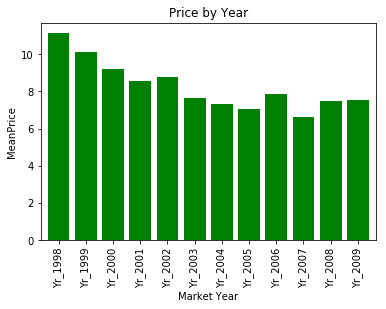

In [16]:
df_subset.plot(
    x='Market Year', 
    y='MeanPrice', 
    kind='bar', 
    legend=False, 
    color='green',
    width=0.8)

plt.ylabel("MeanPrice")
plt.xlabel("Market Year")
plt.title("Price by Year")

In [17]:
df = pd.read_csv('Post-Incentive.csv')
pd.options.display.max_columns = None

In [18]:
df.head(2)

,Year,Average
0,1998,8.9
1,1999,8.1


In [19]:
x=df['Year']
y=df['Average']

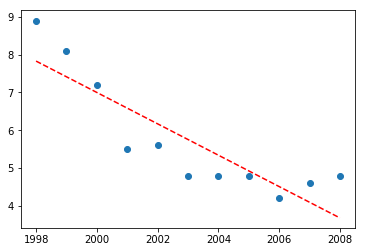

In [20]:
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [21]:
df = pd.read_csv('SolarPanelCostData_v4.csv')
pd.options.display.max_columns = None

In [22]:
#Calculate mean cost for each region :
df.groupby(['Regions'], sort=False)[['Cost']].mean()

,Cost
Regions,
United States,8.120430
West,7.146296
Northeast,7.512698
Midwest,7.995833
South,8.325000


In [23]:
df = pd.read_csv('SolarPanelCostData_v4.csv')
pd.options.display.max_columns = None

In [24]:
#create variables and simple regression line
x=df.iloc[:,2].values.reshape(-1,1)
y=df.iloc[:,3].values.reshape(-1,1)
lr=LinearRegression()
lr.fit(x,y)
y_pred=lr.predict(x)

<function matplotlib.pyplot.show(*args, **kw)>

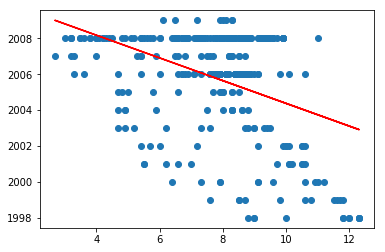

In [25]:
#visualize data
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.show

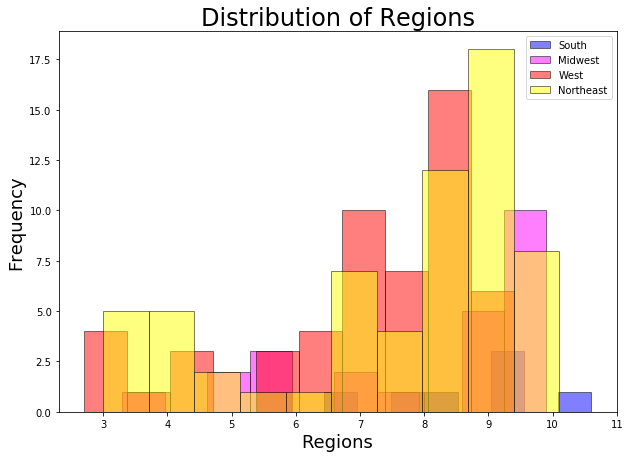

In [26]:
df[df['Regions']=='South'].Cost.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))

df[df['Regions']=='Midwest'].Cost.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))

df[df['Regions']=='West'].Cost.plot(kind='hist',color='red',edgecolor='black',alpha=0.5,figsize=(10,7))

df[df['Regions']=='Northeast'].Cost.plot(kind='hist',color='yellow',edgecolor='black',alpha=0.5,figsize=(10,7))

plt.legend(labels=['South','Midwest', 'West', 'Northeast'])

plt.title('Distribution of Regions', size=24)

plt.xlabel('Regions', size=18)

plt.ylabel('Frequency', size=18);

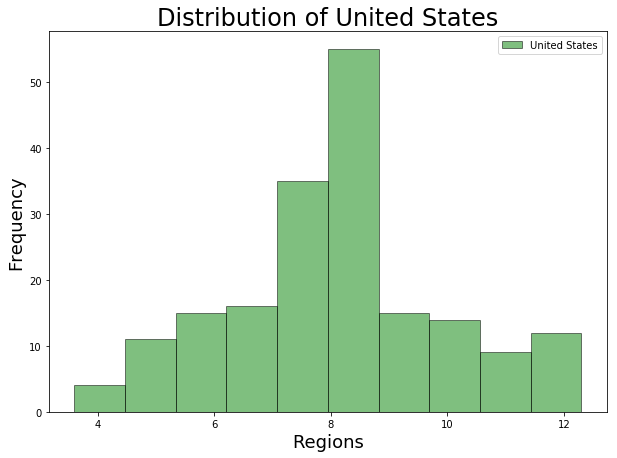

In [73]:
df[df['Regions']=='United States'].Cost.plot(kind='hist',color='green',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['United States'])
plt.title('Distribution of United States', size=24)

plt.xlabel('Regions', size=18)

plt.ylabel('Frequency', size=18);

In [68]:
South = df[df['Regions']=='South']



# Correlation coefficients 

South.corr()

,No,Cost,Market_Year
No,1.000000,-0.860374,0.263635
Cost,-0.860374,1.000000,-0.401522
Market_Year,0.263635,-0.401522,1.000000


In [69]:
Midwest = df[df['Regions']=='Midwest']



# Correlation coefficients 

Midwest.corr()

,No,Cost,Market_Year
No,1.000000,-0.744578,0.295844
Cost,-0.744578,1.000000,0.101562
Market_Year,0.295844,0.101562,1.000000


In [70]:
West = df[df['Regions']=='West']



# Correlation coefficients 

West.corr()

,No,Cost,Market_Year
No,1.000000,-0.740661,0.101847
Cost,-0.740661,1.000000,-0.122095
Market_Year,0.101847,-0.122095,1.000000


In [71]:
Northeast = df[df['Regions']=='Northeast']



# Correlation coefficients 

Northeast.corr()

,No,Cost,Market_Year
No,1.000000,-0.893278,0.159887
Cost,-0.893278,1.000000,-0.164126
Market_Year,0.159887,-0.164126,1.000000
